<a href="https://colab.research.google.com/github/ARU-Bioinformatics/advanced-programming-SBV/blob/main/Extension_to_SIR_Zombie_apocalypse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zombie apocalypse modeling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

Let's set up our models

In [2]:
P = 0      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

# solve the system dy/dt = f(y, t)
def f(y, t):
     Si = y[0]
     Zi = y[1]
     Ri = y[2]
     # the model equations (see Munz et al. 2009)
     f0 = P - B*Si*Zi - d*Si
     f1 = B*Si*Zi + G*Ri - A*Si*Zi
     f2 = d*Si + A*Si*Zi - G*Ri
     return [f0, f1, f2]

Let's give our model some initial conditions to work

In [3]:
# initial conditions
S0 = 500.              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial death population
y0 = [S0, Z0, R0]     # initial condition vector
t  = np.linspace(0, 5., 1000)         # time grid



Solve the ODEs and then plot the output of the apocalypse

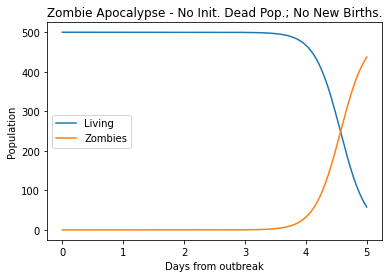

In [4]:
# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

Let's see how changing the conditions changes the outcome:

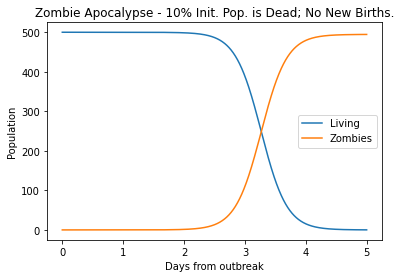

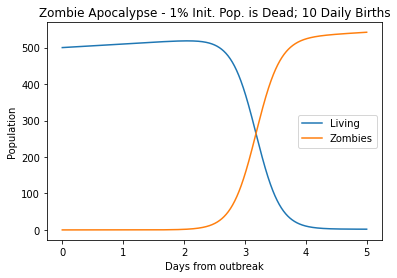

In [5]:


# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 10% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)

# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
P  = 10        # 10 new births daily
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births')
plt.legend(loc=0)

Exercise:
Try seeing how changing the number of births and the % of the population who are initially deceased speeds up the conversion to zombies